In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
from sklearn.compose import ColumnTransformer
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import QuantileTransformer

from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import median_absolute_error

In [3]:
df = pd.read_csv("AirfoilSelfNoise.csv")

In [4]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:

print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (1052, 5)
X_test (451, 5)
y_train (1052,)
y_test (451,)


In [8]:
df.nunique()

f               21
alpha           27
c                6
U_infinity       4
delta          105
SSPL          1456
dtype: int64

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df["SSPL"] = scaler.fit_transform(df[["SSPL"]])

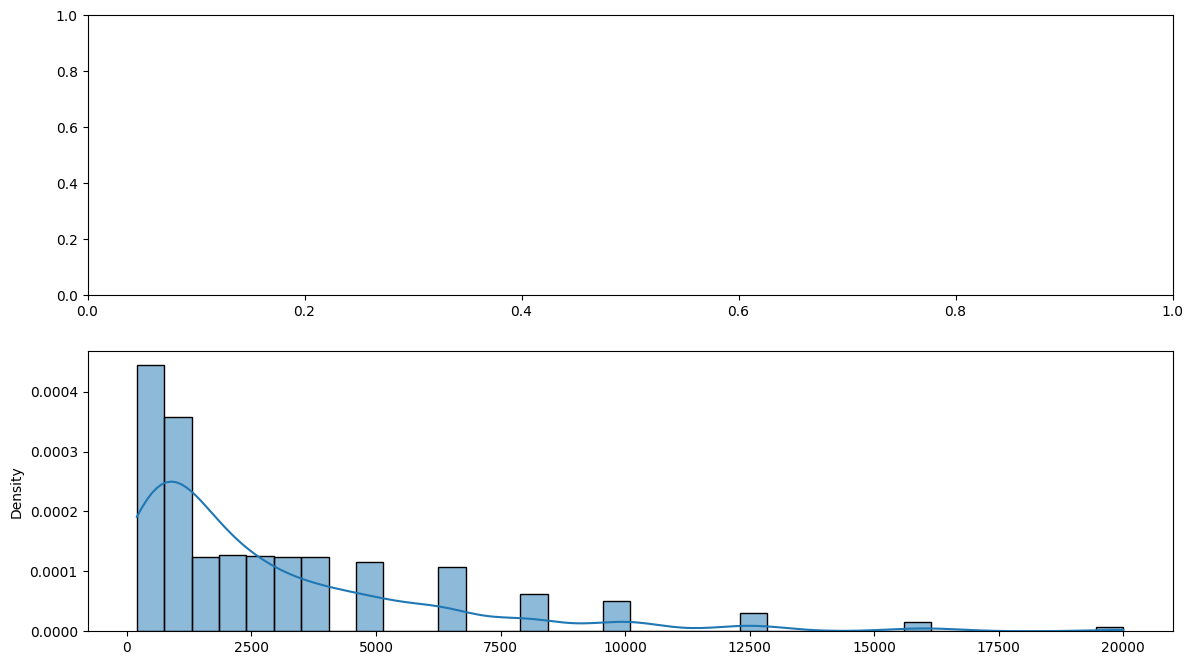

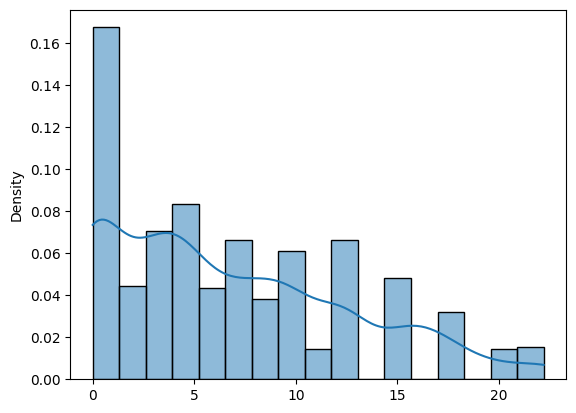

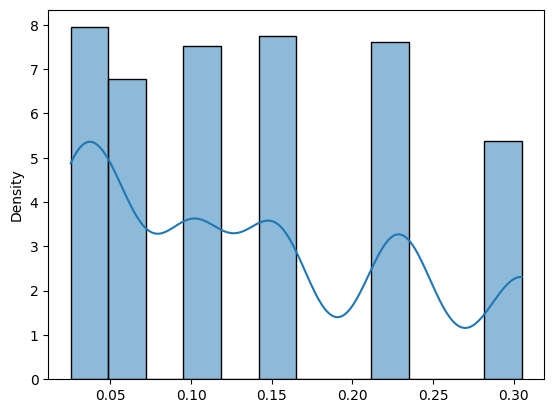

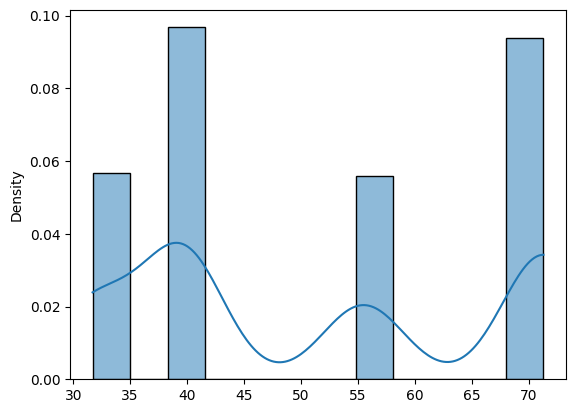

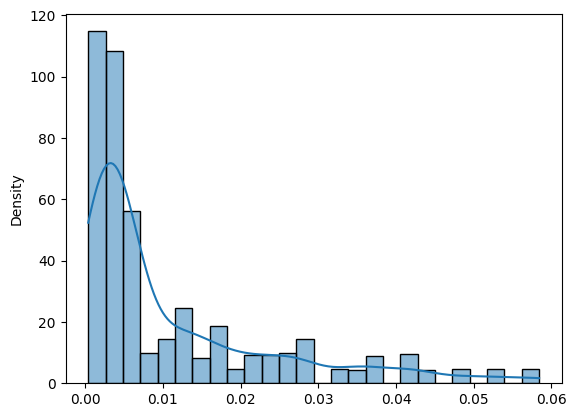

In [10]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2)
fig.set_size_inches(14, 8)
for i in df.columns:
    if i != "SSPL":
        sns.histplot(df[i].to_numpy(),kde=True,stat="density")
        plt.show()

In [11]:
df.describe()

,f,alpha,c,U_infinity,delta,SSPL
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,0.570531
std,3152.573137,5.918128,0.093541,15.572784,0.013150,0.183441
min,200.000000,0.000000,0.025400,31.700000,0.000401,0.000000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,0.447018
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,0.594065
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,0.707727
max,20000.000000,22.200000,0.304800,71.300000,0.058411,1.000000


In [12]:

from sklearn.ensemble import (
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor
)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error 

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing  import StandardScaler

In [14]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [15]:
import pickle
pickle.dump(regressor, open('model.pkl', 'wb'))

In [16]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

array([124.06649005, 119.46413909, 120.33254103, 129.60886761,
       129.78612472, 132.64423416, 122.4349038 , 126.74983006,
       130.01045658, 125.98273694, 132.48873564, 113.83051731,
       130.13817923, 132.56057082, 123.65534464, 113.99243741,
       124.34984419, 126.70187871, 129.23000637, 131.83506582,
       125.76768033, 125.00648272, 116.41914989, 129.86629416,
       124.21067831, 124.67311231, 131.6322296 , 124.6043593 ,
       115.64678565, 123.26378128, 125.22302256, 123.89962071,
       125.51202054, 118.6912124 , 121.72209401, 130.96423273,
       131.37300187, 128.30505685, 121.40529584, 117.87341962,
       126.42152289, 128.89466472, 126.40892509, 123.45296426,
       123.11311866, 130.1672403 , 125.09652956, 120.00622727,
       123.17401814, 132.83265792, 128.71305692, 117.79809953,
       123.48169003, 122.52751265, 126.70612854, 120.54580229,
       123.29728962, 128.69414033, 124.25737638, 123.24008395,
       125.43355297, 131.05870029, 126.77173379, 131.40

In [17]:
regressor.score(X, y)

0.5146055695922862

In [18]:
from math import sqrt

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 7.935849981231498
RMSE value for k=  2 is: 6.856214896443112
RMSE value for k=  3 is: 6.415502075865907
RMSE value for k=  4 is: 6.250589892794049
RMSE value for k=  5 is: 6.229539543795849
RMSE value for k=  6 is: 6.2198624609203925
RMSE value for k=  7 is: 6.171036602665449
RMSE value for k=  8 is: 6.1062017271715625
RMSE value for k=  9 is: 6.122443884281447
RMSE value for k=  10 is: 6.114295959322039
RMSE value for k=  11 is: 6.075303133616124
RMSE value for k=  12 is: 6.061787828848199
RMSE value for k=  13 is: 6.046711859447434
RMSE value for k=  14 is: 6.086604425937055
RMSE value for k=  15 is: 6.107282514204049
RMSE value for k=  16 is: 6.098411175649886
RMSE value for k=  17 is: 6.090276459067336
RMSE value for k=  18 is: 6.107212304610441
RMSE value for k=  19 is: 6.08392035132831
RMSE value for k=  20 is: 6.075924910565043


<Axes: >

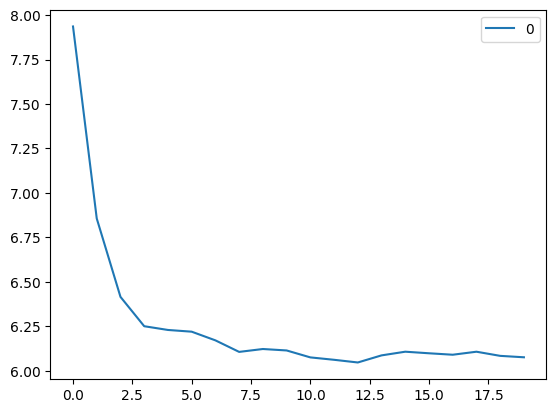

In [19]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [20]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 9}

In [21]:
from sklearn.linear_model import Ridge

In [23]:
import numpy as np
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

4.780443341213814
0.520902595196316
4.860775944045596
0.4995586607584893


In [ ]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

4.927234311901675
0.49102799119345697
4.972826432378312
0.4762204063879114


In [24]:
from sklearn.linear_model import ElasticNet
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

5.138344057988143
0.44647934753553165
5.234517711563946
0.41964287693171354


In [25]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor(random_state=0)
DTregressor.fit(X_train, y_train)

DT_regression_train_enet= DTregressor.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,DT_regression_train_enet)))
print(r2_score(y_train, DT_regression_train_enet))

DT_regression_test_enet= DTregressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,DT_regression_test_enet)))
print(r2_score(y_test, DT_regression_test_enet))

0.0
1.0
2.828431990216769
0.8305531682226158


In [26]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

SVRregressor = SVR(kernel = 'rbf')

SVRregressor.fit(X_train, y_train)

SVRregressor_train= SVRregressor.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,SVRregressor_train)))
print(r2_score(y_train, SVRregressor_train))

SVRregressor_test= SVRregressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,SVRregressor_test)))
print(r2_score(y_test, SVRregressor_test))

6.134090720211437
0.21116193823727847
6.543219794087512
0.09317185683300144


In [27]:
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
RFRegressor = RandomForestRegressor(n_estimators=100,random_state=0)

RFRegressor.fit(X_train, y_train)

RFRegressor_train= RFRegressor.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,RFRegressor_train)))
print(r2_score(y_train, RFRegressor_train))

RFRegressor_test= RFRegressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,RFRegressor_test)))
print(r2_score(y_test, RFRegressor_test))

0.7264944793271877
0.988934982509145
1.86913409642853
0.9260015042070754


In [28]:
import pickle
pickle.dump(RFRegressor, open('model.pkl', 'wb'))

In [29]:
#Loading the pickle file
pickled_model = pickle.load(open('model.pkl','rb'))
pickled_model.predict(X_test)

array([124.01356, 119.08015, 119.05415, 135.96486, 134.3908 , 123.90382,
       124.30481, 134.16162, 135.17432, 127.83087, 127.13894, 113.05041,
       133.22127, 132.11656, 124.85585, 109.18768, 130.30454, 130.5213 ,
       128.5655 , 124.55298, 124.49784, 127.09157, 111.02096, 125.3546 ,
       124.09246, 126.07204, 129.96028, 131.47297, 110.67112, 131.16481,
       132.34045, 121.87621, 128.46288, 119.17913, 119.22125, 132.6391 ,
       133.79806, 129.95653, 120.94756, 112.13787, 125.27798, 134.84603,
       126.92855, 121.73059, 127.40775, 134.64523, 130.25222, 118.24101,
       121.7165 , 133.67128, 132.81039, 114.47991, 129.38836, 127.13103,
       126.7044 , 120.84921, 123.54013, 128.88271, 122.36401, 119.01366,
       125.87119, 134.5317 , 129.92801, 133.0232 , 117.30853, 125.02081,
       122.89163, 120.08063, 125.86144, 129.52683, 128.95296, 130.3322 ,
       128.39768, 116.98525, 129.91158, 128.19444, 129.74471, 132.78384,
       134.22131, 135.60673, 125.22669, 120.25925, 

In [40]:
dict_test = {'f':400, 'alpha':0, 'c':0.3048, 'U_infinity':31.7, 'delta':0.003313}

In [34]:
list(dict_test.values())

[9, 8, 10, 1, 7]

In [41]:
pickled_model.predict([list(dict_test.values())])[0]

d:\FSDS\Project Folder\Airfoil-Regression-With-Deployment-main\Airfoil-Regression-With-Deployment-main\air_foil_self\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


124.01356000000006

In [39]:
X_test.head(n=1)

,f,alpha,c,U_infinity,delta
51,400,0.0,0.3048,31.7,0.003313
